<a href="https://colab.research.google.com/github/dcsgod/datascience/blob/main/Stock_market_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION BHARAT INTERN DATA SCIENCE TASK 1**

In [9]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [11]:
# Load the stock price of tatamotors data from a CSV file
df = pd.read_csv('TATAMOTORS.csv')

# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)


In [12]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [13]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]


In [14]:
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)


In [15]:
# Define the length of the input sequences
sequence_length = 10

# Create the input sequences and labels
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
133/133 [==============================] - 10s 24ms/step - loss: 0.0070
Epoch 2/10
133/133 [==============================] - 3s 26ms/step - loss: 6.9883e-04
Epoch 3/10
133/133 [==============================] - 2s 17ms/step - loss: 6.4739e-04
Epoch 4/10
133/133 [==============================] - 2s 17ms/step - loss: 6.4609e-04
Epoch 5/10
133/133 [==============================] - 2s 17ms/step - loss: 5.8669e-04
Epoch 6/10
133/133 [==============================] - 2s 17ms/step - loss: 5.9612e-04
Epoch 7/10
133/133 [==============================] - 3s 23ms/step - loss: 5.8296e-04
Epoch 8/10
133/133 [==============================] - 2s 18ms/step - loss: 5.3526e-04
Epoch 9/10
133/133 [==============================] - 2s 17ms/step - loss: 4.7355e-04
Epoch 10/10
133/133 [==============================] - 2s 16ms/step - loss: 4.6756e-04


33/33 [==============================] - 2s 6ms/step


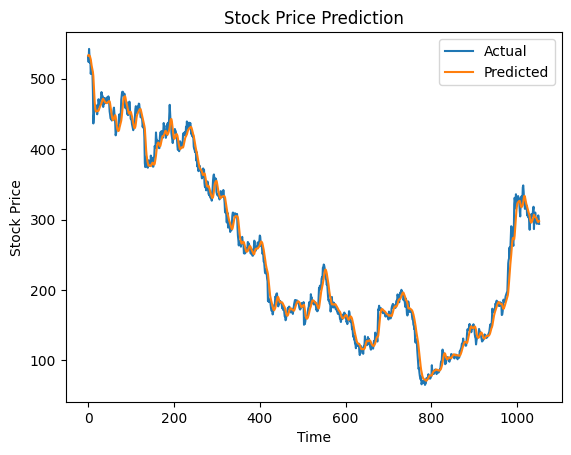

In [18]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Inverse scale the actual values for comparison
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted and actual values
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
